<a href="https://colab.research.google.com/github/Brunno1012/Analise-de-Filmes/blob/main/Analises_Filmes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#PROJETO ANALISE DE FILMES
#Este notebook tem como objetivo explorar e analisar dados sobre filmes, utilizando bibliotecas como Pandas, Seaborn e Scikit-Learn. Através de visualizações e modelos estatísticos, buscamos identificar padrões e tendências nos dados, como a relação entre orçamento e bilheteria ou a influência das avaliações na popularidade dos filmes.
#Os conceitos de machine learning são basicos, começei a estudar mais sobre esta área recentemente


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.linear_model import LinearRegression

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [ ]:
data = pd.read_csv('cost_revenue_dirty.csv')

In [ ]:
#tamanho do dataframe
data.shape

(5391, 6)

In [ ]:
data.sample(5)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3747,3227,10/2/2010,Triangle,"$12,000,000","$1,595,168",$0
4114,5177,3/7/2012,Some Guy Who Kills People,"$300,000",$0,$0
2198,2365,3/19/2004,Eternal Sunshine of the Spotless Mind,"$20,000,000","$72,703,462","$34,366,518"
3169,75,6/27/2008,WALL-E,"$180,000,000","$532,590,994","$223,808,164"
1329,3518,10/22/1999,The Best Man,"$9,000,000","$34,572,780","$34,102,780"


In [ ]:
data.tail()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5386,2950,10/8/2018,Meg,"$15,000,000",$0,$0
5387,126,12/18/2018,Aquaman,"$160,000,000",$0,$0
5388,96,12/31/2020,Singularity,"$175,000,000",$0,$0
5389,1119,12/31/2020,Hannibal the Conqueror,"$50,000,000",$0,$0
5390,2517,12/31/2020,"Story of Bonnie and Clyde, The","$20,000,000",$0,$0


In [ ]:
#Verificando se tem valores NAN no dataframe.
print(f'Any NaN values among the data? {data.isna().values.any()}')

Any NaN values among the data? False


In [ ]:
#Verificando se tem linhas duplicadas.
print(f'Any duplicates? {data.duplicated().values.any()}')
duplicated_rows = data[data.duplicated()]
print(f'Number of duplicates: {len(duplicated_rows)}')

Any duplicates? False
Number of duplicates: 0


In [ ]:
#Analisando o tipo das colunas se verifica que elas estao formatadas de um jeito errado, estao com object.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   object
 4   USD_Worldwide_Gross    5391 non-null   object
 5   USD_Domestic_Gross     5391 non-null   object
dtypes: int64(1), object(5)
memory usage: 252.8+ KB


In [ ]:
#as colunas abaixo estao como object, por conta do da virgula e do cifrao. Assim removemos eles, e transformamos em int

chars_to_remove = [',', '$']
columns_to_clean = ['USD_Production_Budget',
                    'USD_Worldwide_Gross',
                    'USD_Domestic_Gross']

for col in columns_to_clean:
    for char in chars_to_remove:
        data[col] = data[col].astype(str).str.replace(char, "")
    data[col] = pd.to_numeric(data[col])

In [ ]:
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,110000,11000000,10000000
1,5140,5/9/1916,Intolerance,385907,0,0
2,5230,12/24/1916,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,9/17/1920,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1/1/1925,The Big Parade,245000,22000000,11000000


In [ ]:
#transformando a coluna Release_Date para Date.
data.Release_Date = pd.to_datetime(data.Release_Date)
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   5391 non-null   int64         
 1   Release_Date           5391 non-null   datetime64[ns]
 2   Movie_Title            5391 non-null   object        
 3   USD_Production_Budget  5391 non-null   int64         
 4   USD_Worldwide_Gross    5391 non-null   int64         
 5   USD_Domestic_Gross     5391 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 252.8+ KB


In [ ]:
data.describe()
#O filme médio custa cerca de US$ 31 milhões para ser feito e rende cerca de 3x isso
#todos os filmes no quartil inferior perdem dinheiro, uma vez que o custo médio é de 5 milhões de dólares e apenas geram receitas mundiais de 3,8 milhões de dólares
#o maior orçamento de produção foi de US$ 425 milhões e a maior receita mundial foi de US$ 2.783.918.982.

,Rank,Release_Date,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,"5,391.00",5391,"5,391.00","5,391.00","5,391.00"
mean,"2,696.00",2003-09-19 15:02:02.203672704,"31,113,737.58","88,855,421.96","41,235,519.44"
min,1.00,1915-08-02 00:00:00,"1,100.00",0.00,0.00
25%,"1,348.50",1999-12-02 12:00:00,"5,000,000.00","3,865,206.00","1,330,901.50"
50%,"2,696.00",2006-06-23 00:00:00,"17,000,000.00","27,450,453.00","17,192,205.00"
75%,"4,043.50",2011-11-23 00:00:00,"40,000,000.00","96,454,455.00","52,343,687.00"
max,"5,391.00",2020-12-31 00:00:00,"425,000,000.00","2,783,918,982.00","936,662,225.00"
std,"1,556.39",NaN,"40,523,796.88","168,457,757.00","66,029,346.27"


In [ ]:
#Filme de menor orçamento de produção
data[data.USD_Production_Budget == 1100.00]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
2427,5391,2005-05-08,My Date With Drew,1100,181041,181041


In [ ]:
#Filme de maior orçamento de produção
data[data.USD_Production_Budget == 425000000.00]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3529,1,2009-12-18,Avatar,425000000,2783918982,760507625


In [ ]:
#Vemos que há 512 filmes no conjunto de dados que não tiveram receita nos Estados Unidos.
#No entanto, os filmes de maior orçamento e sem receita têm data de lançamento APÓS a data em que o conjunto de dados foi compilado (1º de maio de 2018).

zero_domestic = data[data.USD_Domestic_Gross == 0]
print(f'Number of films that grossed $0 domestically {len(zero_domestic)}')
zero_domestic.sort_values('USD_Production_Budget', ascending=False)

Number of films that grossed $0 domestically 512


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla",80000000,4547660,0
...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0
3056,5374,2007-12-31,Tin Can Man,12000,0,0
4907,5381,2015-05-19,Family Motocross,10000,0,0
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0


In [ ]:
#Quando verificamos as receitas mundiais, vemos que há 357 filmes que não ganharam dinheiro internacionalmente.
#Porém, 512 versus 357. Por que há diferença?
#Razão pela qual alguns filmes internacionais nunca foram exibidos nos Estados Unidos.  Na verdade, podemos ver um exemplo disso na imagem anterior. "Don Gato, el inicio de la pandilla" arrecadou cerca de US$ 4,5 milhões de dólares nas bilheterias, mas nada nos Estados Unidos.


zero_worldwide = data[data.USD_Worldwide_Gross == 0]
print(f'Number of films that grossed $0 worldwide {len(zero_worldwide)}')
zero_worldwide.sort_values('USD_Production_Budget', ascending=False)

Number of films that grossed $0 worldwide 357


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5058,880,2015-11-12,The Ridiculous 6,60000000,0,0
...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0
3056,5374,2007-12-31,Tin Can Man,12000,0,0
4907,5381,2015-05-19,Family Motocross,10000,0,0
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0


In [ ]:
##Filmes que ganharam dinheiro internacionalmente mas tiveram receita de bilheteria zero nos EUA.
international_releases = data.query('USD_Domestic_Gross == 0 and USD_Worldwide_Gross != 0')
print(f'Number of international releases: {len(international_releases)}')
international_releases.tail()

Number of international releases: 155


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5340,1506,2017-04-14,Queen of the Desert,36000000,1480089,0
5348,2225,2017-05-05,Chāi dàn zhuānjiā,23000000,58807172,0
5360,4832,2017-07-03,Departure,1100000,27561,0
5372,1856,2017-08-25,Ballerina,30000000,48048527,0
5374,4237,2017-08-25,Polina danser sa vie,4000000,36630,0


In [ ]:
#Data da coleta de dados
scrape_date = pd.Timestamp('2018-5-1')

In [ ]:
#Filmes que ainda nao foram lançados.
future_releases = data[data.Release_Date >= scrape_date]
print(f'Number of unreleased movies: {len(future_releases)}')
future_releases

Number of unreleased movies: 7


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5386,2950,2018-10-08,Meg,15000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0
5390,2517,2020-12-31,"Story of Bonnie and Clyde, The",20000000,0,0


In [ ]:
#neste dataframe vamos trabalhar sem os filmes que ainda nao foram lançados
data_clean = data.drop(future_releases.index)

In [ ]:
#37 por cento dos filmes não recuperam o orçamento de produção nas bilheterias
money_losing = data_clean.query('USD_Production_Budget > USD_Worldwide_Gross')
money_losing.shape[0]/data_clean.shape[0]

0.37277117384843983

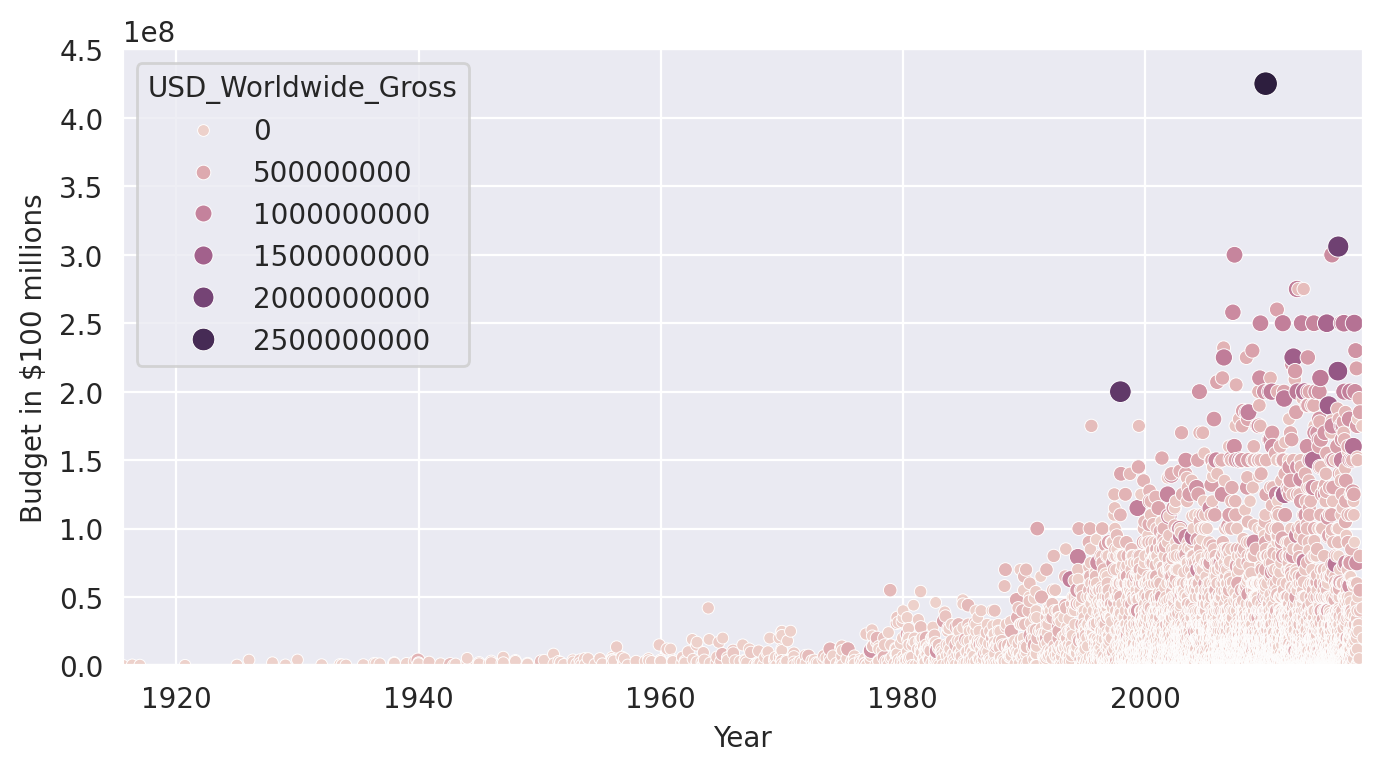

In [ ]:
#nossos filmes de maior bilheteria são maiores e mais sombrios
#em primeiro lugar, os orçamentos dos filmes explodiram nos últimos 40 anos ou mais.
#até a década de 1970, a indústria cinematográfica parecia ter vivido uma era totalmente diferente. Os orçamentos começaram a crescer rapidamente a partir da década de 1980 e continuaram a crescer durante a década de 2000.
#O número de pontos de dados é tão denso a partir de 2000 que eles se sobrepõem.

plt.figure(figsize=(8,4), dpi=200)

with sns.axes_style("darkgrid"):
    ax = sns.scatterplot(data=data_clean,
                    x='Release_Date',
                    y='USD_Production_Budget',
                    hue='USD_Worldwide_Gross',
                    size='USD_Worldwide_Gross',)

    ax.set(ylim=(0, 450000000),
           xlim=(data_clean.Release_Date.min(), data_clean.Release_Date.max()),
           xlabel='Year',
           ylabel='Budget in $100 millions')
plt.show()

In [ ]:
#pegando apenas as decadas, transformando os anos em decadas.
dt_index = pd.DatetimeIndex(data_clean.Release_Date)
years = dt_index.year

In [ ]:
#transformando os anos em decadas.
decades = years//10*10
data_clean['Decade'] = decades

In [ ]:
#separando em dois dataframes os filmes antigos e novos
#os antigos sao antes de 1970, ate 1969 e os novos sao de 1970 em diante
old_films = data_clean[data_clean.Decade <= 1960]
new_films = data_clean[data_clean.Decade > 1960]

In [ ]:
#quando inspecionamos nosso DataFrame old_films, vemos que ele inclui apenas 153 filmes.
#Como vimos no gráfico de bolhas, a maior parte dos filmes do conjunto de dados foi lançada nos últimos 30 anos
old_films.describe()

,Rank,Release_Date,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
count,153.00,153,153.00,153.00,153.00,153.00
mean,"4,274.77",1954-06-10 04:04:42.352941184,"4,611,297.65","30,419,634.38","22,389,473.87","1,949.15"
min,"1,253.00",1915-08-02 00:00:00,"100,000.00",0.00,0.00,"1,910.00"
25%,"3,973.00",1946-01-01 00:00:00,"1,250,000.00","5,273,000.00","5,000,000.00","1,940.00"
50%,"4,434.00",1956-12-23 00:00:00,"2,900,000.00","10,000,000.00","10,000,000.00","1,950.00"
75%,"4,785.00",1964-10-22 00:00:00,"5,000,000.00","33,208,099.00","28,350,000.00","1,960.00"
max,"5,299.00",1969-12-19 00:00:00,"42,000,000.00","390,525,192.00","198,680,470.00","1,960.00"
std,742.14,NaN,"5,713,648.85","54,931,828.93","32,641,752.41",12.72


In [ ]:
#O filme mais caro antes de 1970 foi Cleópatra, com um orçamento de produção de US$ 42 milhões
old_films.sort_values('USD_Production_Budget', ascending=False).head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
109,1253,1963-12-06,Cleopatra,42000000,71000000,57000000,1960
150,2175,1969-12-16,"Hello, Dolly",24000000,33208099,33208099,1960
143,2465,1969-01-01,Sweet Charity,20000000,8000000,8000000,1960
118,2425,1965-02-15,The Greatest Story Ever Told,20000000,15473333,15473333,1960
148,2375,1969-10-15,Paint Your Wagon,20000000,31678778,31678778,1960


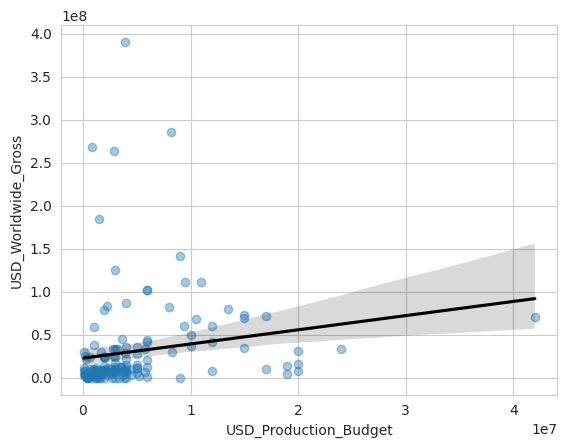

In [ ]:
#Vamos visualizar a relação entre o orçamento do filme e a receita mundial usando regressão linear.
#primeiro podemos localizar Cleópatra na extrema direita. Mas também vemos que muitos filmes de baixo orçamento renderam muito mais dinheiro.
with sns.axes_style("whitegrid"):
  sns.regplot(data=old_films,
            x='USD_Production_Budget',
            y='USD_Worldwide_Gross',
            scatter_kws = {'alpha': 0.4},
            line_kws = {'color': 'black'})




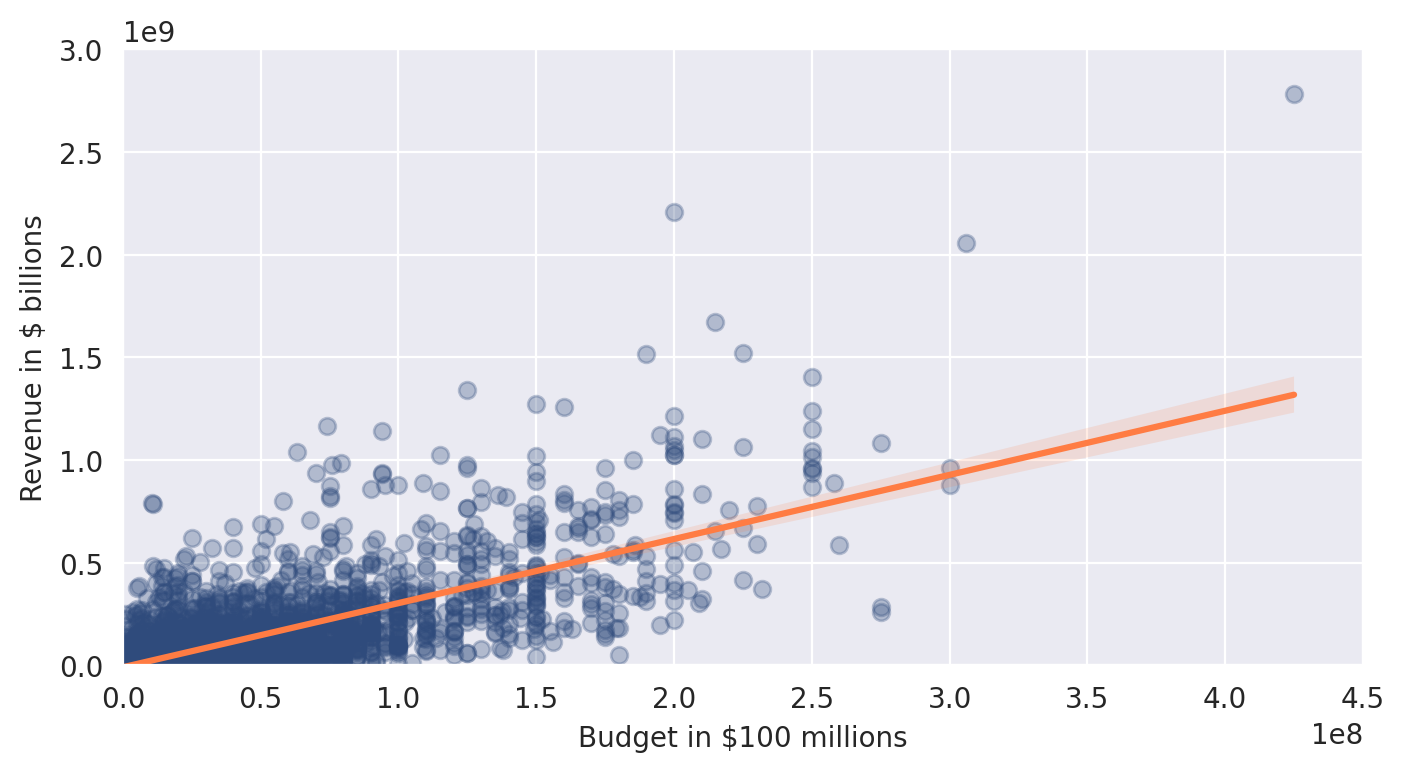

In [ ]:
##Há uma correlação positiva moderada entre o orçamento e a receita. Isso significa que, em geral, filmes com orçamentos mais altos tendem a gerar receitas maiores.
#Alguns filmes com orçamentos altos (à direita do gráfico) não necessariamente geram receitas proporcionais, o que pode indicar variabilidade no sucesso comercial
#A correlação não garante causalidade, e fatores como marketing, elenco e lançamento também afetam a receita.
#Há alguns filmes com alta receita, mesmo com orçamentos relativamente baixos
#Também existem filmes com orçamentos muito altos que não geraram receita proporcional.

plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style('darkgrid'):
  ax = sns.regplot(data=new_films,
                   x='USD_Production_Budget',
                   y='USD_Worldwide_Gross',
                   color='#2f4b7c',
                   scatter_kws = {'alpha': 0.3},
                   line_kws = {'color': '#ff7c43'})

  ax.set(ylim=(0, 3000000000),
         xlim=(0, 450000000),
         ylabel='Revenue in $ billions',
         xlabel='Budget in $100 millions')


In [ ]:
#A regressão linear ajuda a visualizar e quantificar como o aumento do orçamento impacta a receita dos filmes.
# A equação básica da regressão linear é:
#Y = β₀ + β₁X + ε,
# onde x é a variavel independente ou seja oq influencia como o orçamento e Y é a variavel dependente que é oq queremos prever
regression = LinearRegression()

In [ ]:
X = pd.DataFrame(new_films, columns=['USD_Production_Budget'])
y = pd.DataFrame(new_films, columns=['USD_Worldwide_Gross'])

In [ ]:
regression.fit(X, y)

LinearRegression()

In [ ]:
#Theta one
regression.coef_

array([[3.12259592]])

In [ ]:
#Theta zero
regression.intercept_

array([-8650768.00661027])

In [ ]:
# se o orçamento de um filme for de US$ 0, a receita estimada do filme será de -US$ 8,65 milhões.
# então isso é claramente irrealista. Por que nosso modelo nos contaria tal absurdo? Bem, a razão é que estamos especificando antecipadamente qual deve ser o modelo - ou seja, uma linha reta - e então encontrando a melhor linha reta para nossos dados.
# Afinal, é apenas uma estimativa e essa estimativa será mais precisa no gráfico onde temos mais pontos de dados


#E a inclinação? A inclinação nos diz que para cada US$ 1 extra no orçamento, a receita do filme aumenta em US$ 3,1
#Então, isso é muito interessante. Isso significa que quanto maior for o nosso orçamento, maior será a nossa receita estimada.


In [ ]:
#é uma métrica usada para avaliar a qualidade de um modelo de regressão R-Quadrado
#isso significa que nosso modelo explica cerca de 56% da variação na receita do cinema
#se um investigador conseguir construir um modelo simples que explique mais de 50% do que realmente está a acontecer, então é um modelo bastante decente.
regression.score(X,y)

0.5577032617720403

In [ ]:
X = pd.DataFrame(old_films, columns=['USD_Production_Budget'])
y = pd.DataFrame(old_films, columns=['USD_Worldwide_Gross'])
regression.fit(X, y)

print(f"O coeficiente de inclinação é{regression.coef_[0]}")
print(f"O intercepto é {regression.intercept_[0]}")
print(f"O R-quadrado é {regression.score(X,y)}")

O coeficiente de inclinação é[1.64771314]
O intercepto é 22821538.635080386
O R-quadrado é 0.02937258620576877


In [ ]:
#qual é a receita global estimada pelo nosso modelo para um filme com um orçamento de 350 milhões de dólares?
budget = 350000000
revenue_estimate = regression.intercept_[0] + regression.coef_[0,0]*budget
revenue_estimate = round(revenue_estimate, -6)
print(f'The estimated revenue for a $350 film is around ${revenue_estimate:.10}.')

The estimated revenue for a $350 film is around $600000000.0.
